## Bank Telemarketing Campaigns Success Prediction  [EDA and model building]

**The purpsose of this project** is to evaluate the effectiveness of a banking institution's direct marketing campaigns (phone calls).  We will gain valuable insights from Exploratory Data Analysis [EDA] that will assist telemarketers in determining important success factors for future campaigns.

Finally, we will build a **machine learning classifier** capable of accurately predicting whether a given campaign will be successful.

In [1]:
# importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

sns.set_theme(style="white",palette="deep")

In [2]:
# reading in the  dataset
df = pd.read_csv("bank_marketing.csv",sep=';')
print(f"Number of rows in the dataset :{len(df)}")
print(f"Number of features in the dataset :{len(df.columns)}")

Number of rows in the dataset :41188
Number of features in the dataset :21


## Understanding the data
The first step in **exploratory data analysis** is to understand the data. We start by investigating the features, gaining insights into the values contained within them and how they relate to one another and the target feature using statistical and other visual methods.

In [3]:
## printing out the head of the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Our target feature is represented by **y** and contains the values 'yes' and 'no'. We can give it a more descriptive name and convert the values to numbers, making it easier for future data exploration.

In [5]:
df['target'] = df['y'].replace({"yes":1,'no':0})
df = df.drop('y',axis=1)

In [6]:
## checking out the new target feature
df['target'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: target, dtype: float64

Now we'll go over the remaining features and try to learn more about them.

In [7]:
## printing out the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There appear to be no missing values in the dataset, but a closer look at some of the records reveals that missing values are stored as **Unknown**, which we will have to deal with later.

### Examining the Job Feature Column
**Question:** Which job has the **highest rate** of term deposit subscriptions?

There are 12 different categories of jobs in the dataset 



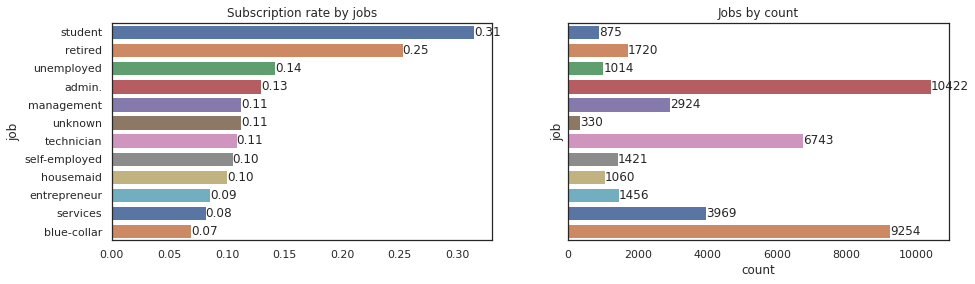

In [8]:
## plotting the job column
fig,axes = plt.subplots(1,2,sharey=True)
fig.set_figheight(4), 
fig.set_figwidth(15)

job_by = df.groupby("job")['target'].mean().sort_values(ascending=False)
sns.barplot(x= job_by.values,y=job_by.index,ax=axes[0],palette='deep')
sns.countplot(data=df,y='job',ax=axes[1],order=job_by.index,palette='deep')
axes[0].set(title=("Subscription rate by jobs"))
axes[1].set(title=("Jobs by count"));

jobs = df['job'].value_counts()
print(f"There are {len(jobs)} different categories of jobs in the dataset \n")


## function to show bar level on bars
def show_bar_label(ax,fmt):
    for i in ax.containers:
        ax.bar_label(i,fmt=fmt)
        
show_bar_label(axes[0],fmt='%.2f')
show_bar_label(axes[1],fmt='%.0f')

Student appears to have the highest subscription rate of all job categories, but given their small sample size, let us conduct a hypothesis test to see if the subscription rate of **0.30%** is acceptable and not due to the chance.

**H0** = proportion of student who subscribed is 0.30   
**H1** = proportion of student who subscribe is less than 0.30  

**using 5% significant level**, we reject the null hyptothesis if z score is lower than the z critical

In [458]:
## Hypothesis testing
p = 0.30
q = 1 - p
sample_size = 500
student_df = df[df['job']=='student'].sample(sample_size, random_state=100)
p_hat = student_df['target'].sum()/sample_size
std = np.sqrt((p*q)/sample_size)

In [459]:
z = (p_hat-p)/std
z_critical = norm().ppf(0.05)

print(f"z_score : {z:.2f}")
print(f"critcal score : {z_critical:.2f}")

z_score : 1.07
critcal score : -1.64


**Conclusion**: At the 5% level of significance, the sample data do not provide sufficient evidence to reject the null hypothesis that the percentage of students who subscribed to a term deposit is less than **30%**.

**Recommendation**: Because students are more likely to subscribe than other job categories, marketers should target them more in future campaigns, as they make up a relatively small portion of our current campaign outreach.

### Examining the Marital Status Column  
**Question:** Does a person's **marital status** influence their likelihood to subscribe?

According to the plot below, a customer's **marital status** has no discernible effect on subscription rate, so marital status cannot be used to predict whether someone will subscribe.

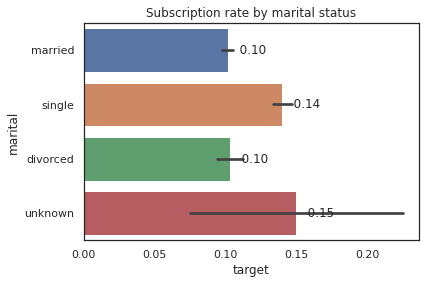

In [11]:
plt.title("Subscription rate by marital status")
ax = sns.barplot(data=df,y='marital',x='target');
show_bar_label(ax,fmt ='   %.2f')

### Examining the Education Feature Column
**Question:** Is there an effect of **education** on subscription?

According to the plot below, **education** has no discernible effect on subscriptions.

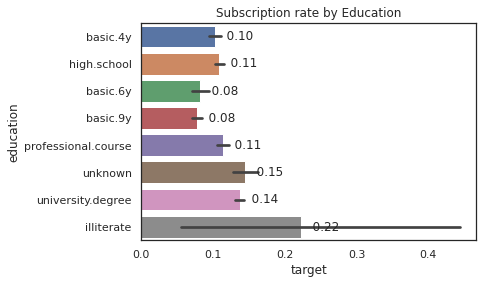

In [12]:
plt.title("Subscription rate by Education")
ax = sns.barplot(data=df,y='education',x='target');
show_bar_label(ax,fmt ='   %.2f')

### Renaming the education columns

In [13]:
df['education'] = df['education'].replace({'university.degree':"higher education",
                                               'high.school':'high school',
                                                'basic.4y':"basic",
                                                'basic.6y':"basic",
                                                'basic.9y':"basic",
                                                "professional.course":"higher education",
                                                'unknown':'unknown',
                                                'illiterate':'illiterate',
                                              })

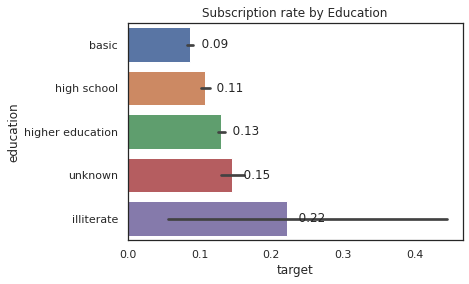

In [14]:
plt.title("Subscription rate by Education")
ax = sns.barplot(data=df,y='education',x='target');
show_bar_label(ax,fmt ='   %.2f')

### Examining the Day of Week Feature Column
**Question:** Do certain days of week result in a higher subscription rate ?  

According to the plot below, a specific **day of the week** is unlikely to produce a higher result than any other day of the week.

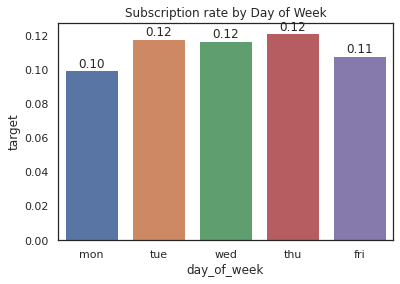

In [15]:
plt.title("Subscription rate by Day of Week")
ax = sns.barplot(data=df,x='day_of_week',y='target',ci=None);
show_bar_label(ax,fmt ='%.2f')

### Examining the Month Feature Column
**Question:** Do certain **months** have a higher rate of subscriptions?

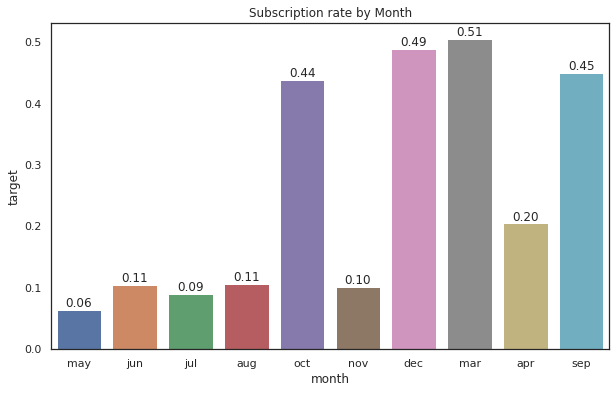

In [16]:
fig,ax = plt.subplots(1,1)
fig.set_figheight(6),fig.set_figwidth(10)
plt.title("Subscription rate by Month")
ax = sns.barplot(data=df,x='month',y='target',ci=None);
show_bar_label(ax,fmt ='%.2f')

A quick glance at the plot shows that certain months, such as **March** and **December**, have significantly higher subscription rates among customers. While the sample size appears to be the smallest among the months, hypothesis testing can show if the difference is indeed significant or due to chance.

In [17]:
pd.DataFrame(df['month'].value_counts(ascending=True)).T

,dec,mar,sep,oct,apr,nov,jun,aug,jul,may
month,182,546,570,718,2632,4101,5318,6178,7174,13769


Choosing a null hypothesis of **40%** to really highlight the difference between other months.

**H0** = proportion of customers who subscribed in the month of **March**  is equal to  **40%**  
**H1** = proportion of customers who subscribe in the month of **March** is lesser than **40%**

Using 5% significant level, we reject the null hyptothesis if the  z-score is lower than the z critical, we also carry out hypothesis testing for December, September and October also.

In [18]:
for mon in ['dec','mar','sep','oct']:
    p = 0.40
    q = 1-p
    sample_size = len(df[ df['month'] == mon ])
    student_df = df[ df['month'] == mon ]
    p_hat = student_df['target'].sum() / sample_size
    std = np.sqrt( (p*q) /sample_size )
    
    z = (p_hat - p) / std
    z_critical = norm().ppf(0.95)
    print(f"For {mon}: z_score : {z:.2f}; critical score: {z_critical:.2f}")

For dec: z_score : 2.45; critical score: 1.64
For mar: z_score : 5.03; critical score: 1.64
For sep: z_score : 2.39; critical score: 1.64
For oct: z_score : 2.12; critical score: 1.64


**Conclusion:** At the 5% level of significance, the sample data does not show enough evidence to reject the null hypothesis.  

**Recommendation:** The company should look into whether there are any confounding factors as to why the given months have such a significant effect on subscription rates. They should start by looking into why these months have such a small sample size in the first place.

### Examining the Poutcome Feature Column [outcome of the previous marketing campaign]

**Question:** Does the previous campaign's outcome influence the current campaign?.

**Conclusion:** According to the plot below, the previous marketing campaign's success has a **65%** impact on the current campaign's success.

**Recommendation:** Marketers should contact more people who have previously subscribed successfully.

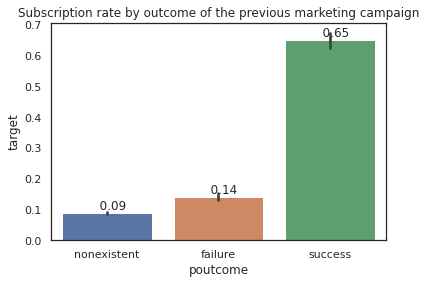

In [19]:
plt.title("Subscription rate by outcome of the previous marketing campaign")
ax = sns.barplot(data=df,x='poutcome',y='target');
show_bar_label(ax,fmt ='   %.2f')

### Plotting the remaining categorical columns

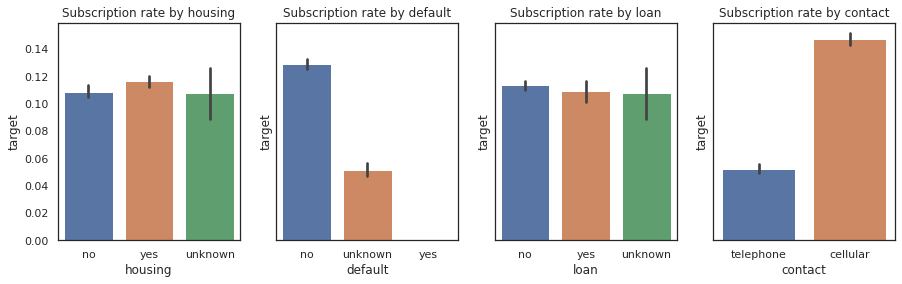

In [20]:
pl = ['housing','default','loan','contact']
fig,axes = plt.subplots(1,len(pl),sharey=True)
fig.set_figwidth(15)
for i in range(len(pl)):
    axes[i].set(title=(f"Subscription rate by {pl[i]}"))
    sns.barplot(data=df,x=pl[i],y='target',ax=axes[i])

### Exploring the Numerical columns

In [21]:
## Summary statistics of the numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Getting an overview through an Heatmap
An heatmap can quickly provide an overview to explore the correlation between features

<AxesSubplot:>

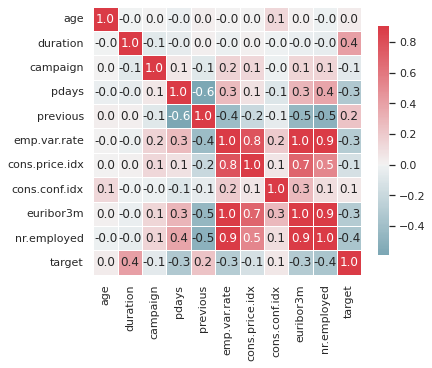

In [22]:
numeric_cols = df.select_dtypes("number")
fig,axes = plt.subplots(1,1,sharey=True)
fig.set_figwidth(6)
fig.set_figheight(6)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data=numeric_cols.corr(),vmax=.9 ,center=0, cmap=cmap,
            square=True, linewidths=.5 ,annot=True,fmt='.1f',cbar_kws={"shrink": .7})

A glance through the plot and we can see most of the features are not correlated with each other but some do have an high correlation such as **'emp.var.rate'** and **'euribor3m'** with perfect correlation of **1**. 

### Exploring the age distribution
The age column seems to posses a lot outliers which we will have to handle later

<AxesSubplot:xlabel='age'>

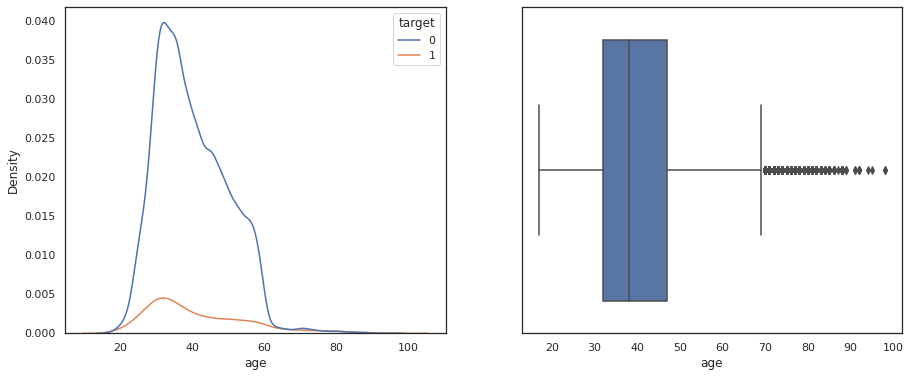

In [23]:
fig,axes = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(6)
sns.kdeplot(data=df,x='age',hue='target',ax=axes[0])
sns.boxplot(data=df,x='age',ax=axes[1])

## Feature Engineering and Model Building
Following the completion of the initial exploration analysis, we will move on to feature engineering and the development of our classification model.

It is critical to select an appropriate classification measure for a machine learning model, and this should be done with the objective of meeting the business need in mind. In this context, we will optimize for **recall**, supposing that not misclassifying a potential subscriber is more important than increasing precision.

### Model Building
We are going to train and fine tune the 3 machine learning models which are listed below:

- Logistic Regression
- Random Forest
- LightGBM

### Dropping the duration column 
The duration of a call is not known before the call is placed. Also, after the end of the call, the target is obviously known, so the duration feature is not needed for our classification model.

In [24]:
df = df.drop("duration",axis=1)

In [25]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

### Binning the age column

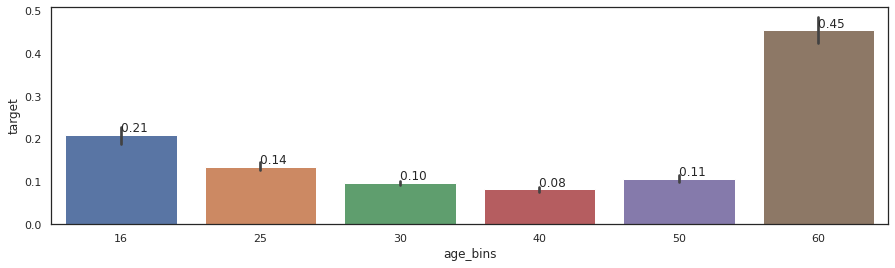

In [26]:
df['age_bins']=list(pd.cut(df['age'],bins=[16,25,30,40,50, 60,100],
                      labels=[16,25,30,40,50,60]))
fig,axes = plt.subplots(1,1,sharey=True)
fig.set_figwidth(15)
ax = sns.barplot(data=df,x='age_bins',y='target')
show_bar_label(ax,fmt ='       %.2f')

In [27]:
df['age_bins'].value_counts()

30    16385
40    10240
50     6270
25     5717
16     1666
60      910
Name: age_bins, dtype: int64

In [28]:
# importing packages for building our model
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, KMeansSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [29]:
## Creating our train and test set
train  = df.drop("target",axis=1)
test  = df['target']

X_train,X_test,y_train,y_test = train_test_split(train,test,test_size= 0.1, random_state=200)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size= 0.1, random_state= 200)

print(f"Length of training_set: {len(X_train)}")
print(f"Length of validation_set: {len(X_val)}")
print(f"Length of test_set: {len(X_test)}")

Length of training_set: 33362
Length of validation_set: 3707
Length of test_set: 4119


In [30]:
## creating a pipeline
pipeline = ColumnTransformer([
        ('one hot encoding',OneHotEncoder(),['marital','default','housing','loan','month',
                                             'education','job', 'contact','poutcome','age_bins',
                                            ]),
        ("scaler",StandardScaler(),['campaign','pdays','previous', 
                                    'emp.var.rate','cons.price.idx','previous',
                                    'cons.conf.idx','nr.employed', 'euribor3m'
                                   ]),
        ("drop","drop",['day_of_week'])
],remainder='drop',verbose_feature_names_out=True)

pipeline.fit(X_train)
X_pipeline = pipeline.transform(X_train)


over = SVMSMOTE()
under=RandomUnderSampler()

steps = [('over', over),
         ('under',under)]

samp_pipeline = Pipeline(steps=steps)
X_sampled_train,y_sampled_train = samp_pipeline.fit_resample(X_pipeline,y_train)

In [31]:
X_sampled_train,y_sampled_train = samp_pipeline.fit_resample(X_pipeline,y_train)

### 1. Logistic Regression
We are going to finally build our first model using logistic regression.

In [436]:
param_grid = {'C':[0.1,0.5,0.9],
              'class_weight':[{0:0.1,1:0.9},{0:3,1:0.7}]
             }
gs = GridSearchCV(LogisticRegression(max_iter=10_000) ,param_grid = param_grid, cv= 5, scoring='f1')
gs.fit(X_sampled_train,y_sampled_train)

print(f"Grid Search best score: {gs.best_score_}")
gs.best_params_

Grid Search best score: 0.7189627137832273


{'C': 0.1, 'class_weight': {0: 3, 1: 0.7}}

In [449]:
log = LogisticRegression(C=0.1,max_iter=10000,class_weight={0:0.3,1:0.7})
log.fit(X_sampled_train,y_sampled_train);

pred =  log.predict_proba(X_sampled_train)[:,1]>=0.488
prec  = precision_score(y_sampled_train,pred,pos_label=1)
recall  = recall_score(y_sampled_train,pred,pos_label=1)
f1 = f1_score(y_sampled_train,pred)
acc  = accuracy_score(y_sampled_train,pred)

pd.DataFrame([[prec,recall,f1,acc]],columns=['precision','recall','f1 score','accuracy']).T

,0
precision,0.756277
recall,0.854826
f1 score,0.802537
accuracy,0.789672


### Evaluating on the Validation set

In [438]:
val = pipeline.transform(X_val)
pred = log.predict_proba(val)[:,1]>=0.48

prec = precision_score(y_val,pred,pos_label=1)
recall = recall_score(y_val,pred,pos_label=1)
f1 = f1_score(y_val,pred)
acc  = accuracy_score(y_val,pred)

pd.DataFrame([[prec,recall,f1,acc]],columns=['precision','recall','f1 score','accuracy']).T

,0
precision,0.244915
recall,0.746898
f1 score,0.368873
accuracy,0.722147


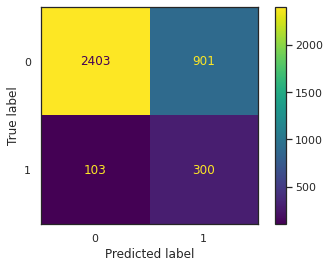

In [35]:
## displaying the confusion matrix
cm = confusion_matrix(y_val, pred, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=log.classes_)
disp.plot()

### 2. Random Forest
We'll use **Random Forest** to build our second model. 

In [36]:
param_grid={
    'max_depth':[9,11],  
     'min_samples_leaf': [2,3,5],
     'min_samples_split':[2,3,6,7],
    }

gs = GridSearchCV(RandomForestClassifier(),param_grid = param_grid, cv=5, scoring='f1')
gs.fit(X_sampled_train,y_sampled_train)
print(f"Grid Search best score: {gs.best_score_}")
print(gs.best_params_)

Grid Search best score: 0.8384751682566686
{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [91]:
clf = RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=3 ,class_weight={0:0.3,1:0.7}
                            )
clf.fit(X_sampled_train,y_sampled_train)
pred =  clf.predict_proba(X_sampled_train)[:,1]>=0.43

prec  = precision_score(y_sampled_train,pred,pos_label=1)
recall  = recall_score(y_sampled_train,pred,pos_label=1)
f1 = f1_score(y_sampled_train,pred)
acc  = accuracy_score(y_sampled_train,pred)

pd.DataFrame([[prec,recall,f1,acc]],columns=['precision','recall','f1 score','accuracy']).T

,0
precision,0.804404
recall,0.948985
f1 score,0.870734
accuracy,0.859117


### Evaluating on the Validation set

In [456]:
val = pipeline.transform(X_val)
pred = clf.predict_proba(val)[:,1] >= 0.43

prec = precision_score(y_val,pred,pos_label=1)
recall = recall_score(y_val,pred,pos_label=1)
f1 = f1_score(y_val,pred)
acc  = accuracy_score(y_val,pred)

pd.DataFrame([[prec,recall,f1,acc]],columns=['precision','recall','f1 score','accuracy']).T

,0
precision,0.266240
recall,0.722084
f1 score,0.389037
accuracy,0.753439


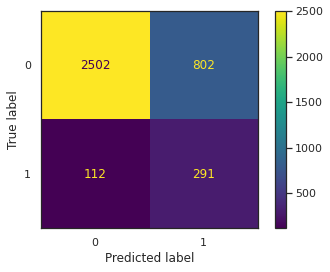

In [457]:
cm = confusion_matrix(y_val, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf.classes_)
disp.plot()

### 3. LightGBM 
We are going to create our third and final model using **LightGBM**.

In [381]:
param_grid={
    'max_depth':[60,70],
    'num_leaves': [100,300],
    'min_child_samples':[30,40],
    'scale_pos_weight':[3,4]
    }

gs = GridSearchCV(LGBMClassifier(random_state=100), param_grid = param_grid,cv=5,scoring='f1')
gs.fit(X_sampled_train,y_sampled_train)
print(f"Grid Search best score: {gs.best_score_}")
print(gs.best_params_)

Grid Search best score: 0.9312587654432238
{'max_depth': 60, 'min_child_samples': 40, 'num_leaves': 300, 'scale_pos_weight': 3}


In [427]:
lgb = LGBMClassifier(max_depth=60,min_child_samples=40,num_leaves=300, random_state=100,scale_pos_weight=3,learning_rate=0.01)
lgb.fit(X_sampled_train,y_sampled_train);
pred =  lgb.predict_proba(X_sampled_train)[:,1]>=0.5

prec  = precision_score(y_sampled_train,pred,pos_label=1)
recall  = recall_score(y_sampled_train,pred,pos_label=1)
f1 = f1_score(y_sampled_train,pred)
acc  = accuracy_score(y_sampled_train,pred)

pd.DataFrame([[prec,recall,f1,acc]],columns=['precision','recall','f1 score','accuracy']).T

,0
precision,0.880354
recall,0.951350
f1 score,0.914476
accuracy,0.911027


### Evaluating on the Validation set

In [429]:
val = pipeline.transform(X_val)
pred = lgb.predict_proba(val)[:,1]>=0.4

prec = precision_score(y_val,pred,pos_label=1)
recall = recall_score(y_val,pred,pos_label=1)
f1 = f1_score(y_val,pred)
acc  = accuracy_score(y_val,pred)

pd.DataFrame([[prec,recall,f1,acc]],columns=['precision','recall','f1 score','accuracy']).T

,0
precision,0.263538
recall,0.724566
f1 score,0.386499
accuracy,0.749933


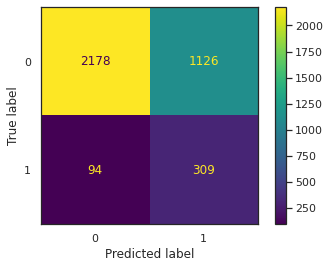

In [98]:
cm = confusion_matrix(y_val, pred, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=log.classes_)
disp.plot()

### Evaluating on the test set
Though the logistic regression model has the highest recall in the validation set, the low f1 score and accuracy made us go with the LightGBM model as our model of choice.

In [453]:
Xt = pipeline.transform(X_test)
log_pred = log.predict_proba(Xt)[:,1]>=0.4
rf_pred = clf.predict_proba(Xt)[:,1] >= 0.43
lgb_pred = lgb.predict_proba(Xt)[:,1]>=0.4

rf_prec = precision_score(y_test,rf_pred,pos_label=1)
rf_recall = recall_score(y_test,rf_pred,pos_label=1)
rf_f1 = f1_score(y_test,rf_pred)
rf_acc  = accuracy_score(y_test,rf_pred)

log_prec = precision_score(y_test,log_pred,pos_label=1)
log_recall = recall_score(y_test,log_pred,pos_label=1)
log_f1 = f1_score(y_test,log_pred)
log_acc  = accuracy_score(y_test,log_pred)

lgb_prec = precision_score(y_test,lgb_pred,pos_label=1)
lgb_recall = recall_score(y_test,lgb_pred,pos_label=1)
lgb_f1 = f1_score(y_test,lgb_pred)
lgb_acc  = accuracy_score(y_test,lgb_pred)

pd.DataFrame([[log_prec,log_recall,log_f1,log_acc],
             [rf_prec,rf_recall,rf_f1,rf_acc],
              [lgb_prec,lgb_recall,lgb_f1,lgb_acc]]
             ,columns=['precision','recall','f1 score','accuracy']
             ,index=['logistic','random forest','lightGBM']).T

,logistic,random forest,lightGBM
precision,0.189975,0.282238,0.283200
recall,0.799578,0.734177,0.746835
f1 score,0.307007,0.407733,0.410673
accuracy,0.584608,0.754552,0.753338
